In [1]:
!pip -q install langchain huggingface_hub langchain-google-genai chromadb tiktoken faiss-cpu
!pip -q install sentence_transformers
!pip -q install -U FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.4/337.4 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!mkdir -p blog_posts
!unzip -q /content/langchain_blog_posts.zip -d blog_posts

In [3]:
import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

# Hypothetical Document Embeddings (HyDE)

modified from - https://github.com/langchain-ai/langchain/tree/master/cookbook

HyDE creates a "Hypothetical" answer with the LLM and then embeds that for search

HyDE = Base Embedding model+ LLM Chain (with prompts)

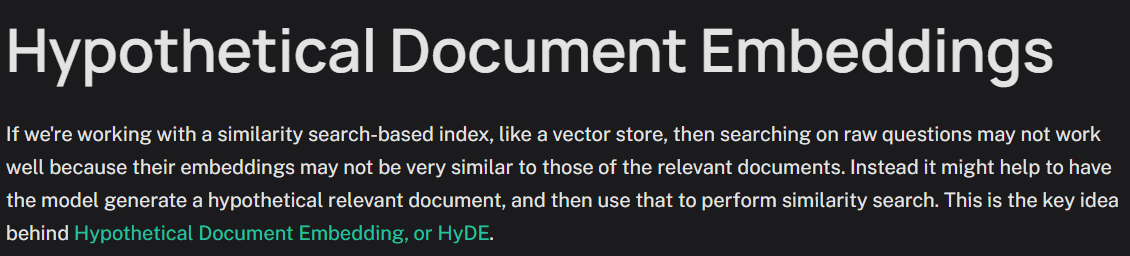

In [5]:
!pip install -q langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.8 MB/s eta 0:00:00


In [6]:
from langchain_google_genai import GoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.chains import LLMChain, HypotheticalDocumentEmbedder
from langchain.prompts import PromptTemplate

from langchain.document_loaders import TextLoader
import langchain

## BGE Embeddings

In [7]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en-v1.5"
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

bge_embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs={'device': 'cuda'},
    encode_kwargs=encode_kwargs
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
# Set up the LLM
llm = GoogleGenerativeAI(model="gemini-1.5-pro")

In [10]:
# Load with `web_search` prompt
embeddings = HypotheticalDocumentEmbedder.from_llm(llm,
                                                   bge_embeddings,
                                                   prompt_key="web_search"
                                                   )

In [11]:
embeddings.llm_chain.prompt

PromptTemplate(input_variables=['QUESTION'], template='Please write a passage to answer the question \nQuestion: {QUESTION}\nPassage:')

In [12]:
langchain.debug = True

In [13]:
# Now we can use it as any embedding class!
result = embeddings.embed_query("What items does McDonalds make?")

[llm/start] [llm:GoogleGenerativeAI] Entering LLM run with input:
{
  "prompts": [
    "Please write a passage to answer the question \nQuestion: What items does McDonalds make?\nPassage:"
  ]
}
[llm/end] [llm:GoogleGenerativeAI] [4.08s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "McDonald's is known for its fast food staples, offering a menu that centers around burgers, chicken, and fries. Some of their most popular items include the Big Mac, Quarter Pounder with Cheese, Chicken McNuggets, and of course, their iconic French Fries. Beyond these classics, McDonald's also offers a variety of other items like breakfast sandwiches (e.g., Egg McMuffin), salads, wraps, McCafé beverages (e.g., coffee, smoothies), and desserts (e.g., McFlurry, apple pie).  It's important to note that menu items can vary depending on location and time of day. \n",
        "generation_info": null,
        "type": "Generation"
      }
    ]
  ],
  "llm_output": null,
  "run": 

In [14]:
result

[-0.03086574748158455,
 -0.020206889137625694,
 0.02819032035768032,
 -0.026556232944130898,
 0.0549716018140316,
 0.05975135788321495,
 0.06862831860780716,
 -0.016917958855628967,
 0.012814297340810299,
 -0.02982955425977707,
 -0.025826971977949142,
 -0.017778970301151276,
 -0.023110317066311836,
 -0.018375957384705544,
 0.05200909078121185,
 -0.016231708228588104,
 0.023127418011426926,
 -0.043447017669677734,
 -0.05793085694313049,
 -0.064107246696949,
 0.05029551312327385,
 0.021949851885437965,
 -0.08374422788619995,
 0.029566217213869095,
 0.03047030419111252,
 -0.024542829021811485,
 0.04751068353652954,
 -0.02482866495847702,
 -0.050493527203798294,
 -0.12852460145950317,
 0.04367418959736824,
 -0.060538191348314285,
 0.05829101800918579,
 -0.09321670234203339,
 -0.039366111159324646,
 0.004942119587212801,
 0.03915262594819069,
 -0.019494010135531425,
 0.00033177362638525665,
 -0.014166075736284256,
 0.07460276037454605,
 -0.03213530778884888,
 0.06267300993204117,
 -0.018530

## Multiple generations
We can also generate multiple documents and then combine the embeddings for those. By default, we combine those by taking the average. We can do this by changing the LLM we use to generate documents to return multiple things.

In [21]:
multi_llm = OpenAI(n=4, best_of=4)

In [22]:
embeddings = HypotheticalDocumentEmbedder.from_llm(
    multi_llm, bge_embeddings, "web_search"
)

In [ ]:
result = embeddings.embed_query("What is McDonalds best selling item?")

## Using our own prompts
Besides using preconfigured prompts, we can also easily construct our own prompts and use those in the LLMChain that is generating the documents. This can be useful if we know the domain our queries will be in, as we can condition the prompt to generate text more similar to that.

In the example below, let's condition it to generate text about a state of the union address (because we will use that in the next example).

In [24]:
prompt_template = """Please answer the user's question as a single food item
Question: {question}
Answer:"""

prompt = PromptTemplate(input_variables=["question"], template=prompt_template)

llm_chain = LLMChain(llm=llm, prompt=prompt)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [25]:
embeddings = HypotheticalDocumentEmbedder(
    llm_chain=llm_chain,
    base_embeddings=bge_embeddings
)

In [26]:
result = embeddings.embed_query(
    "What is is McDonalds best selling item?"
)

[llm/start] [llm:GoogleGenerativeAI] Entering LLM run with input:
{
  "prompts": [
    "Please answer the user's question as a single food item\nQuestion: What is is McDonalds best selling item?\nAnswer:"
  ]
}
[llm/end] [llm:GoogleGenerativeAI] [1.67s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "French Fries 🍟 \n",
        "generation_info": null,
        "type": "Generation"
      }
    ]
  ],
  "llm_output": null,
  "run": null
}


In [27]:
result

[-0.07393267750740051,
 -0.011089961044490337,
 0.028535891324281693,
 -0.05915629491209984,
 0.0021421373821794987,
 -0.01749507337808609,
 0.06417520344257355,
 0.05537779629230499,
 0.04970502480864525,
 -0.012473545037209988,
 -0.03472702577710152,
 -0.04891274869441986,
 0.013430948369204998,
 -0.0014971852069720626,
 0.017103854566812515,
 -0.054229892790317535,
 0.06710290908813477,
 -0.0159362331032753,
 -0.07883702963590622,
 -0.0559639036655426,
 0.0845935195684433,
 -0.03779100626707077,
 -0.0052573541179299355,
 0.003697847481817007,
 -0.012081361375749111,
 -0.0014089352916926146,
 -0.003145730821415782,
 0.03406475856900215,
 -0.038805898278951645,
 -0.09061351418495178,
 0.04313220456242561,
 -0.015198404900729656,
 0.02447333000600338,
 -0.03907394036650658,
 -0.024541163817048073,
 -0.012415235862135887,
 0.008145169354975224,
 -0.04595626890659332,
 0.014034343883395195,
 0.0011902340920642018,
 0.07017219811677933,
 -0.025272484868764877,
 -0.013133160769939423,
 -0.

## Using HyDE

Now that we have HyDE, we can use it as we would any other embedding class! Here is using it to find similar passages in the state of the union example.

In [28]:
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma

# with open("../../state_of_the_union.txt") as f:
#     state_of_the_union = f.read()

loaders = [
    TextLoader('/content/blog_posts/blog.langchain.dev_announcing-langsmith_.txt'),
    TextLoader('/content/blog_posts/blog.langchain.dev_benchmarking-question-answering-over-csv-data_.txt'),
    TextLoader('/content/blog_posts/blog.langchain.dev_chat-loaders-finetune-a-chatmodel-in-your-voice_.txt'),
]
docs = []
for l in loaders:
    docs.extend(l.load())

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

texts = text_splitter.split_documents(docs) #split_text

In [29]:
texts

[Document(metadata={'source': '/content/blog_posts/blog.langchain.dev_announcing-langsmith_.txt'}, page_content='URL: https://blog.langchain.dev/announcing-langsmith/\nTitle: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications\n\nLangChain exists to make it as easy as possible to develop LLM-powered applications.\n\nWe started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working. We remember seeing Nat Friedman tweet in late 2022 that there was “not enough tinkering happening.” The LangChain open-source packages are aimed at addressing this and we see lots of tinkering happening now (Nat agrees)–people are building everything from chatbots over internal company documents to an AI dungeon master for a Dungeons and Dragons game.'),
 Document(metadata={'source': '/content/blog_posts/blog.langchain.dev_announcing-langsmith_.txt'}, page_content='The 

In [30]:
prompt_template = """Please answer the user's question as related to Large Language Models
Question: {question}
Answer:"""

prompt = PromptTemplate(input_variables=["question"], template=prompt_template)

llm_chain = LLMChain(llm=llm, prompt=prompt)

In [31]:
embeddings = HypotheticalDocumentEmbedder(
    llm_chain=llm_chain,
    base_embeddings=bge_embeddings
)

In [33]:
docsearch = Chroma.from_documents(texts, embeddings)

query = "What is a LLM?"
docs = docsearch.similarity_search(query)

[llm/start] [llm:GoogleGenerativeAI] Entering LLM run with input:
{
  "prompts": [
    "Please answer the user's question as related to Large Language Models\nQuestion: What is a LLM?\nAnswer:"
  ]
}
[llm/end] [llm:GoogleGenerativeAI] [7.87s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "A **Large Language Model (LLM)** is a type of artificial intelligence (AI) system designed to understand and generate human-like text. \n\nHere's a breakdown:\n\n* **Large:** These models are trained on massive datasets of text and code, often containing billions or even trillions of words. This massive scale allows them to learn complex patterns and relationships within language.\n* **Language:** LLMs are specifically designed to work with human language, encompassing text and code. They can understand the nuances of grammar, syntax, and semantics.\n* **Model:** An LLM is a computational representation of language, built using advanced machine learning algorithms, pr

In [36]:
print(len(docs))

4


In [41]:
print(docs[0].page_content)

In traditional machine learning you usually start with a dataset of inputs and outputs, and you use this to train and then evaluate your model. However, because LLMs are fantastic zero shot learners, it is now possible to use a prompt to quickly build an application based on just an idea, and no data. While this is incredibly powerful in terms of enabling developers to build new applications quickly, it leads to difficulty in evaluating because you lack that data. This is why we've built LangSmith in a way where constructing datasets is as easy as possible.

Likewise, there's often not great metrics for evaluating LLM applications. The outputs are often natural language, and traditional NLP metrics like BLEU and ROUGE aren't great. But what is good at understanding natural language? LLMs! We're pretty bullish on LLM assisted evaluation and have invested in building a bunch of evaluators that use LLMs to do the evaluation.
